## Example: Decision Tree on the Iris Dataset

Now, let's follow the above pipeline to do a simple data mining task using the iris dataset.

### Step 0: Understand the data and task (concept)

We are aiming to train a classification model on the iris dataset for inferencing the type of an iris using a decision tree. Please be aware that in academic courses, your professor or tutor typically provides specific instructions for this step. Consequently, you may forget this phase in your first several projects, potentially negatively impacting your development process.

### Step 1: Data collection (and storage)

The iris dataset is a built-in dataset in the `scikit-learn` package, so we could directly load it and check its related information.

In [1]:
from sklearn import datasets

irisRaw = datasets.load_iris()
print(irisRaw.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Step 2: Data preparation (preprocessing)

In general, for proper data preprocessing steps, we can first explore the dataset.

# data points: 150
# data targets: 150
data classes: ['setosa' 'versicolor' 'virginica']


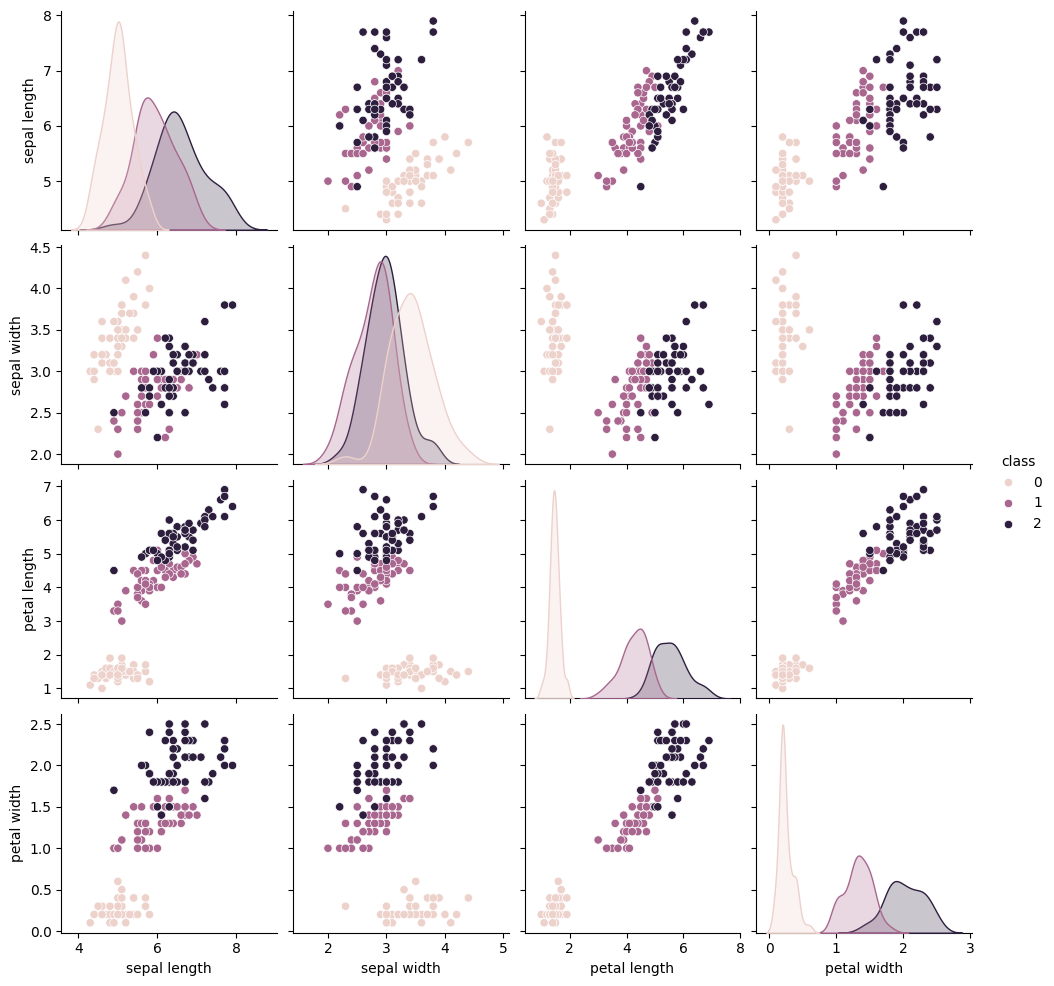

In [2]:
import pandas
import seaborn
# iris.data, iris.target, target_names
print("# data points: %d" % len(irisRaw.data))
print("# data targets: %d" % len(irisRaw.target))
print("data classes:", irisRaw.target_names)

# pandas.DataFrame is a popular data structure in DM
irisDF = pandas.DataFrame(irisRaw.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
irisDF['class'] = irisRaw.target
# seaborn.pairplot provides pairwise relationships in a dataset, easily showing the distribution of each class w.r.t. features.
seaborn.pairplot(irisDF, hue='class')

The distribution of each class (0: setosa, 1: versicolor, 2: virginica) does not largely overlapped with each other, which means the iris dataset is easy to be classified, thus a trivial classification algorithm would work well. In this example, we use a decision tree. Note that there are many more insights which you may extract from this data. For different datasets, different data exploration steps should be applied.

Next, we can split the data into two parts for training and testing, respectively.

In [3]:
from sklearn.model_selection import train_test_split

trX, teX, trY, teY = train_test_split(irisRaw.data, irisRaw.target, test_size=0.3)  # 70% data for training, 30% data for testing
assert(len(trX) == len(trY))
assert(len(teX) == len(teY))
print("# data points for training:", len(trX))
print("# data points for training:", len(teX))

# data points for training: 105
# data points for training: 45


### Step 3: Applying multiple classifiers

We create a list of classifiers now.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

classifiers = [
    DecisionTreeClassifier(max_depth=5, min_samples_leaf=5),
    DecisionTreeClassifier(max_depth=2, min_samples_leaf=5),
    svm.SVC(),
    GaussianNB()
]
for c in classifiers:
    c.fit(trX, trY)

Visualize the decision tree.

### Step 4: Evaluation

Now we check the performances of this trained decision tree.

In [5]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report

# find the f1 score or all classifiers
for c in classifiers:
    ypred = c.predict(teX)
    print("F1-Score on %s: %f" % (str(c), accuracy_score(ypred,teY)))
    print(classification_report(ypred, teY))

F1-Score on DecisionTreeClassifier(max_depth=5, min_samples_leaf=5): 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

F1-Score on DecisionTreeClassifier(max_depth=2, min_samples_leaf=5): 0.977778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        13
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

F1-Score on SVC(): 0.977778
              precision    recall  f1-score   support
